<a href="https://colab.research.google.com/github/JARIN-TIAS/DataAnalysis-/blob/main/Doctor_CRM_Data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving Doctor_crm_data.xlsx to Doctor_crm_data.xlsx


In [2]:
!pip install pandas openpyxl


In [5]:
import pandas as pd

# Load the Excel file (replace 'your_file.xlsx' with the actual filename)
df = pd.read_excel('/content/Doctor_crm_data.xlsx')
# Display the first few rows
print(df.head())

# Get summary information
print(df.info())


   SL    Agent Name              Brand       Phone      Query Type  \
0   1  Sumaiya  NaN  Square Toiletries  1950709602  caller hung up   
1   2  Sumaiya  NaN  Square Toiletries  1804357662           prank   
2   3   Samana  NaN  Square Toiletries  1742833648           prank   
3   4  Sumaiya  NaN  Square Toiletries  1784719364  caller hung up   
4   5   Samana  NaN  Square Toiletries  1917431263           prank   

  Caller Patient Verbatim Call Status           Created at  
0        Inbound   silent      Silent  2024-10-24 08:01:24  
1        Inbound    prank       Prank  2024-10-24 08:09:38  
2        Inbound      NaN       Prank  2024-10-24 08:13:34  
3        Inbound   silent      Silent  2024-10-24 09:06:29  
4        Inbound      NaN       Prank  2024-10-24 09:24:26  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   SL             

In [9]:
#Data Cleaning Check for missing values
print(df.isnull().sum())

# Fill missing values or drop them
df.dropna(subset=['Agent', 'Call Status'], inplace=True)  # Replace 'ColumnName' with relevant column



SL                 0
Agent              0
Name              39
Brand              0
Phone              0
Query Type         0
Caller Patient     0
Verbatim          38
Call Status        0
Created at         0
dtype: int64


In [10]:
# Descriptive Analysis
# Frequency counts for 'Query Type'
query_counts = df['Query Type'].value_counts()
print(query_counts)

# Pivot table example
pivot_table = df.pivot_table(index='Agent', columns='Call Status', values='SL', aggfunc='count', fill_value=0)
print(pivot_table)


Query Type
unreachable                            22
HANGUP                                 11
caller hung up                         10
prank                                   7
redial drop successful                  7
drop call                               3
drug query                              2
dry cough                               2
child prank                             2
wants to talk about wife's period       2
Caller didnt respond                    2
on hold                                 2
heavy bleeding during period            2
Child caller                            2
vaccination query                       2
drop call/silent                        2
A swollen bump                          1
period query,vaginal itching            1
dry skin/ how to loose weight           1
hydrocele                               1
skin rash                               1
diarrhoea since last night              1
Skin query                              1
psychological drug quer

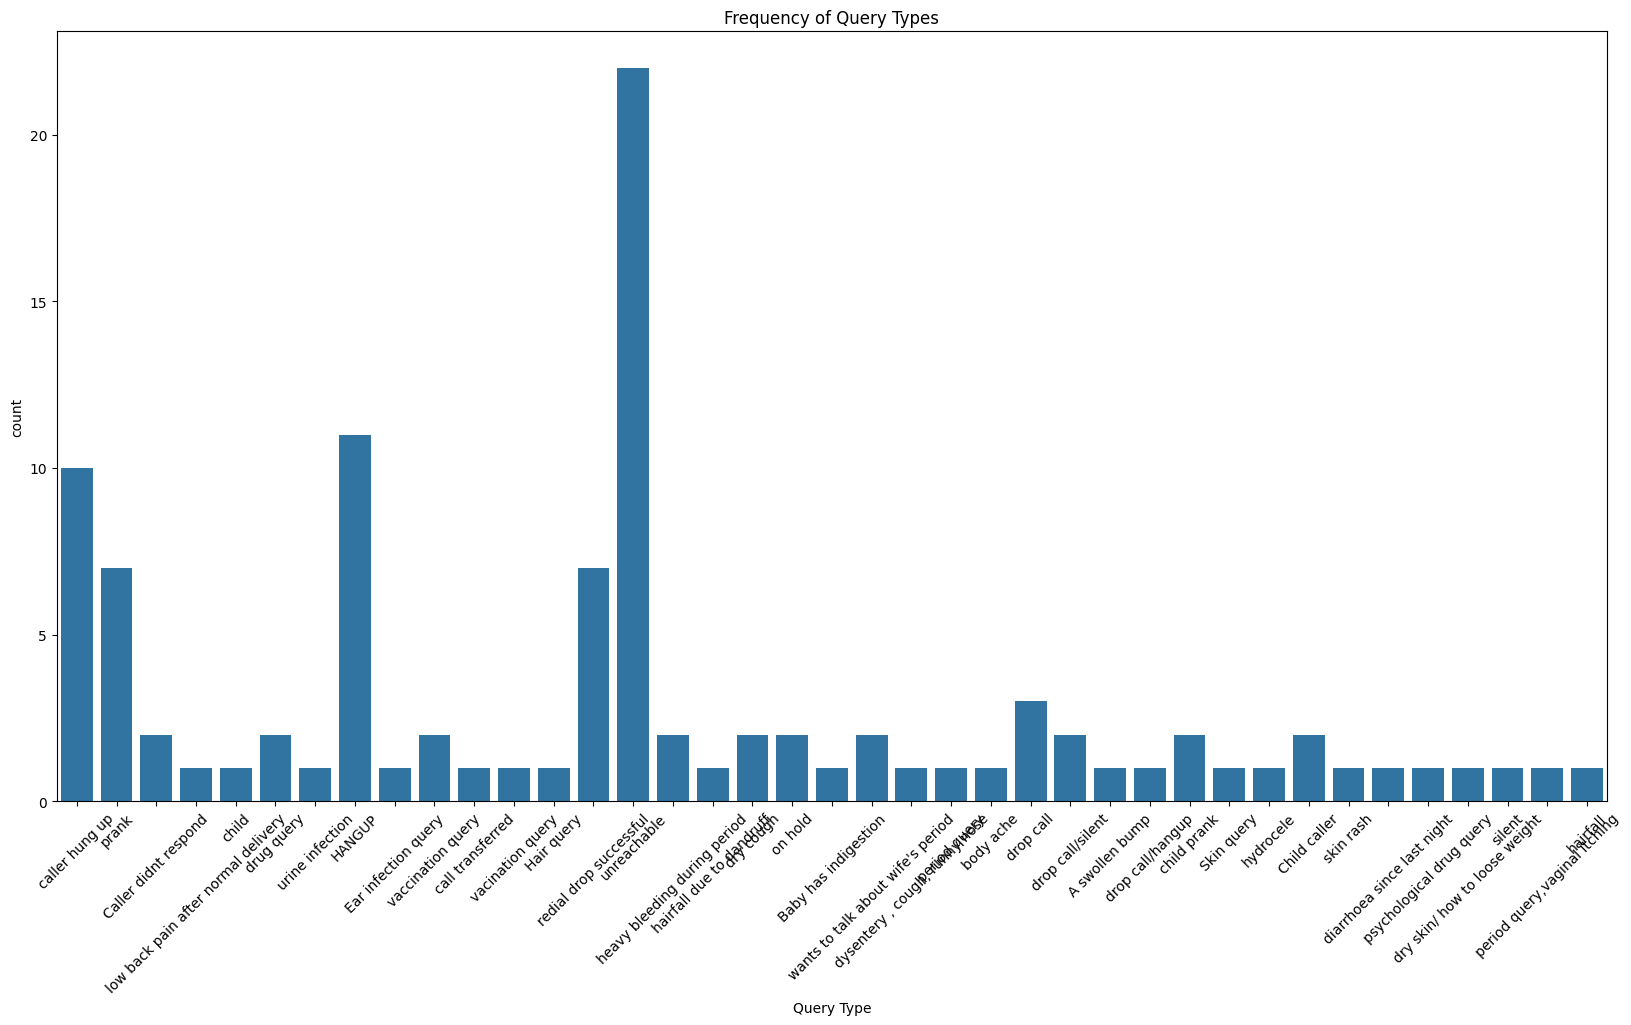

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for Query Type frequencies
plt.figure(figsize=(20, 10))
sns.countplot(data=df, x='Query Type')
plt.xticks(rotation=45)
plt.title('Frequency of Query Types')
plt.show()


In [17]:
#Text Analysis
# Word count in verbatim responses
df['Word Count'] = df['Verbatim'].apply(lambda x: len(str(x).split()) if pd.notna(x) else 0)
print(df[['Verbatim', 'Word Count']])



                                         Verbatim  Word Count
0                                          silent           1
1                                           prank           1
2                                             NaN           0
3                                          silent           1
4                                             NaN           0
..                                            ...         ...
99                                            NaN           0
100  Consult gynaecologist for further evaluation           5
101    maya herbal coconut oil and revive shampoo           7
102                 Advised to call with a parent           6
103                                           NaN           0

[103 rows x 2 columns]


In [20]:
# Convert 'Created' to datetime
df['Created at'] = pd.to_datetime(df['Created at'])

# Group by date
daily_calls = df.groupby(df['Created at'].dt.date).size()
print(daily_calls)


Created at
2024-10-24    103
dtype: int64


# **Different way analysis **

## most calls by agents

Agent
Samana     54
Sumaiya    49
Name: count, dtype: int64


<ipython-input-37-9705546e0d93>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Agent', y='Number of Calls', data=agent_performance, palette='Blues_d')


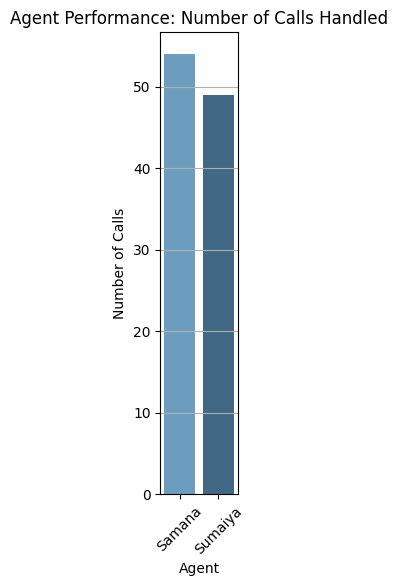

In [37]:

# 1. Agent Performance
agent_performance = df['Agent'].value_counts()
print(agent_performance)

import seaborn as sns

# Calculate agent performance
agent_performance = df['Agent'].value_counts().reset_index()
agent_performance.columns = ['Agent', 'Number of Calls']

# Plotting
plt.figure(figsize=(1, 6))
sns.barplot(x='Agent', y='Number of Calls', data=agent_performance, palette='Blues_d')
plt.title('Agent Performance: Number of Calls Handled')
plt.xlabel('Agent')
plt.ylabel('Number of Calls')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


# **agents with successfull calls**

     Agent  Successful Count
0  Sumaiya                22
1   Samana                20


<ipython-input-38-25527da7e43c>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Agent', y='Successful Count', data=successful_call_counts, palette='Greens_d')


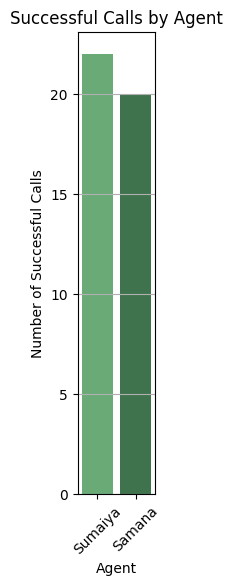

In [38]:
# Filter for successful call statuses (adjust 'Successful' as per your actual status)
successful_statuses = ['Successful', 'Resolved']  # Add other relevant statuses if needed
successful_calls = df[df['Call Status'].isin(successful_statuses)]

# Count successful calls by agent
successful_call_counts = successful_calls['Agent'].value_counts().reset_index()

# Rename columns for clarity
successful_call_counts.columns = ['Agent', 'Successful Count']

# Display the result
print(successful_call_counts)

# Filter for successful call statuses
successful_statuses = ['Successful', 'Resolved']  # Adjust as needed
successful_calls = df[df['Call Status'].isin(successful_statuses)]

# Count successful calls by agent
successful_call_counts = successful_calls['Agent'].value_counts().reset_index()
successful_call_counts.columns = ['Agent', 'Successful Count']

# Plotting
plt.figure(figsize=(1, 6))
sns.barplot(x='Agent', y='Successful Count', data=successful_call_counts, palette='Greens_d')
plt.title('Successful Calls by Agent')
plt.xlabel('Agent')
plt.ylabel('Number of Successful Calls')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


# **agents with most prank calls**

     Agent  Prank Count
0  Sumaiya            6
1   Samana            6


<ipython-input-39-1ffd831f8969>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Agent', y='Prank Count', data=prank_call_counts, palette='Reds_d')


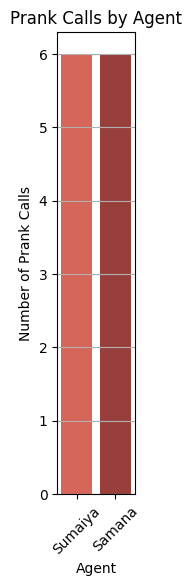

In [39]:
#Filter for prank call statuses (adjust as necessary for your data)
prank_status = 'Prank'  # Replace with the actual status name if different
prank_calls = df[df['Call Status'] == prank_status]

# Count prank calls by agent
prank_call_counts = prank_calls['Agent'].value_counts().reset_index()

# Rename columns for clarity
prank_call_counts.columns = ['Agent', 'Prank Count']

# Display the result
print(prank_call_counts)

# Filter for prank call statuses
prank_status = 'Prank'  # Adjust as necessary for your data
prank_calls = df[df['Call Status'] == prank_status]

# Count prank calls by agent
prank_call_counts = prank_calls['Agent'].value_counts().reset_index()
prank_call_counts.columns = ['Agent', 'Prank Count']

# Plotting
plt.figure(figsize=(1, 6))
sns.barplot(x='Agent', y='Prank Count', data=prank_call_counts, palette='Reds_d')
plt.title('Prank Calls by Agent')
plt.xlabel('Agent')
plt.ylabel('Number of Prank Calls')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [23]:
# 2. Call Status Distribution
call_status_distribution = df['Call Status'].value_counts()
print(call_status_distribution)



Call Status
Successful      42
Unsuccessful    35
Silent          14
Prank           12
Name: count, dtype: int64


In [43]:
# 3. Common Query Types
common_queries = df['Query Type'].value_counts()
print(common_queries)

# Count common query types
common_queries = df['Query Type'].value_counts().reset_index()
common_queries.columns = ['Query Type', 'Count']



Query Type
unreachable                            22
HANGUP                                 11
caller hung up                         10
prank                                   7
redial drop successful                  7
drop call                               3
drug query                              2
dry cough                               2
child prank                             2
wants to talk about wife's period       2
Caller didnt respond                    2
on hold                                 2
heavy bleeding during period            2
Child caller                            2
vaccination query                       2
drop call/silent                        2
A swollen bump                          1
period query,vaginal itching            1
dry skin/ how to loose weight           1
hydrocele                               1
skin rash                               1
diarrhoea since last night              1
Skin query                              1
psychological drug quer

In [25]:
# 4. Analyzing Verbatim Responses
# Basic keyword extraction example
keyword_counts = df['Verbatim'].str.split(expand=True).stack().value_counts()
print(keyword_counts)


to           12
silent       11
advised      10
a             8
given         7
             ..
milk          1
formula       1
Gastrofix     1
napa,         1
shampoo       1
Name: count, Length: 75, dtype: int64


Created at
2024-10-24    103
dtype: int64


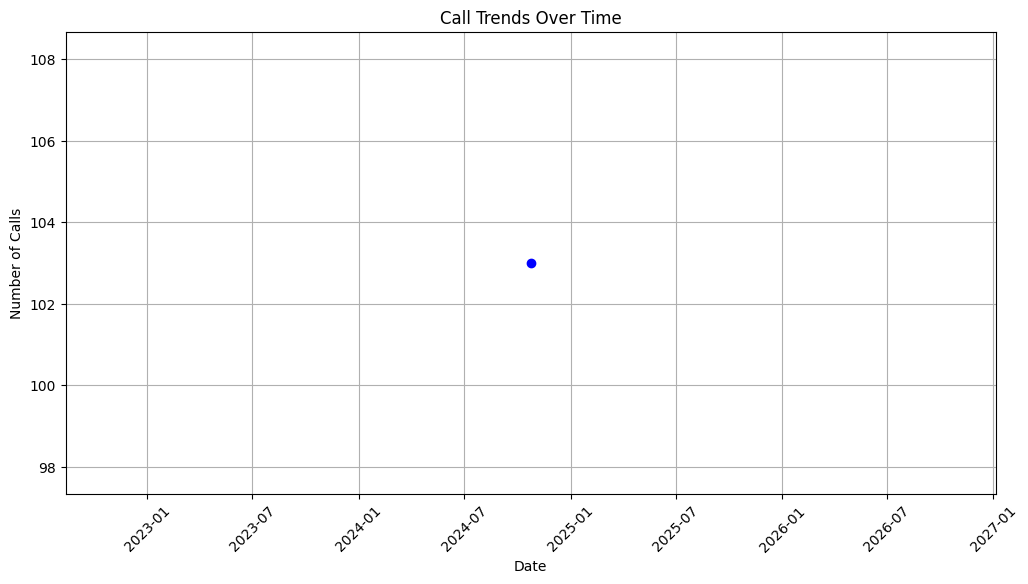

In [44]:
# 5. Call Trends Over Time
df['Created at'] = pd.to_datetime(df['Created at'])
call_trends = df.groupby(df['Created at'].dt.date).size()
print(call_trends)

# Plotting
plt.figure(figsize=(12, 6))
call_trends.plot(kind='line', marker='o', color='blue')
plt.title('Call Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.xticks(rotation=45)
plt.grid()
plt.show()